In [ ]:
# importing the required packages
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshaping the training and testing data 
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [ ]:
# normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

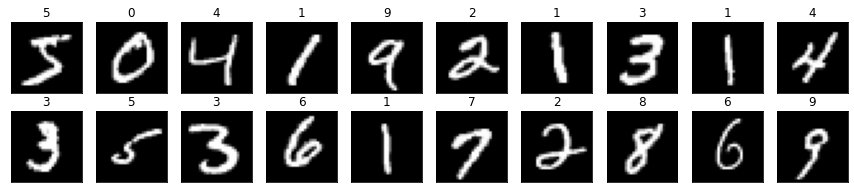

In [ ]:
fig = plt.figure(figsize=(15,3))
for i in range(20):
 ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
 ax.imshow(np.squeeze(x_train[i]), cmap='gray')
 ax.set_title(y_train[i])

In [ ]:
# determine the shape of the input images
inp_shape = x_train.shape[1:]
print(inp_shape)

(28, 28, 1)


In [ ]:
# defining the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=inp_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# text Description of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               6

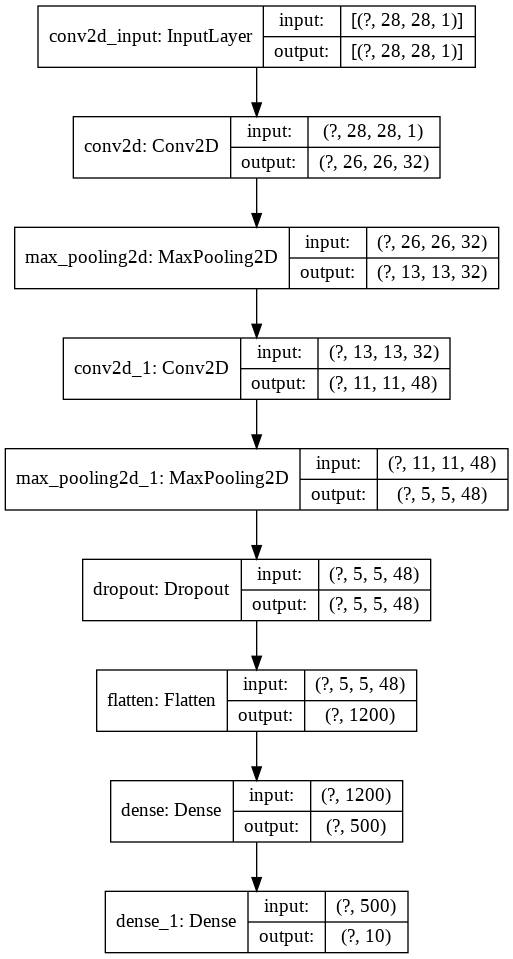

In [ ]:
# ploting the model architecture
plot_model(model, 'model.png', show_shapes=True)

In [ ]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 37s - loss: 0.2473 - accuracy: 0.9237 - val_loss: 0.0637 - val_accuracy: 0.9817
Epoch 2/10
422/422 - 37s - loss: 0.0828 - accuracy: 0.9744 - val_loss: 0.0372 - val_accuracy: 0.9888
Epoch 3/10
422/422 - 37s - loss: 0.0594 - accuracy: 0.9814 - val_loss: 0.0343 - val_accuracy: 0.9905
Epoch 4/10
422/422 - 37s - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.0299 - val_accuracy: 0.9925
Epoch 5/10
422/422 - 37s - loss: 0.0412 - accuracy: 0.9865 - val_loss: 0.0313 - val_accuracy: 0.9918
Epoch 6/10
422/422 - 37s - loss: 0.0361 - accuracy: 0.9884 - val_loss: 0.0286 - val_accuracy: 0.9915
Epoch 7/10
422/422 - 37s - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.0315 - val_accuracy: 0.9923
Epoch 8/10
422/422 - 37s - loss: 0.0295 - accuracy: 0.9901 - val_loss: 0.0252 - val_accuracy: 0.9935
Epoch 9/10
422/422 - 37s - loss: 0.0270 - accuracy: 0.9908 - val_loss: 0.0276 - val_accuracy: 0.9928
Epoch 10/10
422/422 - 37s - loss: 0.0240 - accuracy: 0.9916 - val_loss: 0.0236 - val_accura

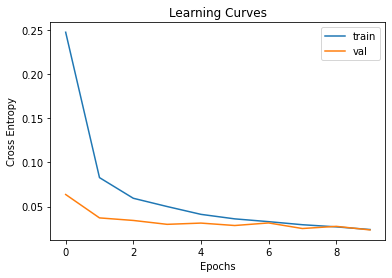

In [ ]:
# ploting the learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epochs')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.29999709129333


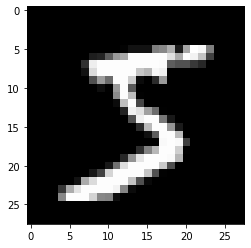

In [ ]:

image = x_train[0]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

In [ ]:
# make a prediction
# reshaping the image for model input
image= image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
# predicting the label of image
yhat = model.predict([image])
print('Predicted: {}'.format(argmax(yhat)))

Predicted: 5
